In [21]:
import pandas as pd
df =  pd.read_csv(r"INE_2024_2074.csv", sep=";")
df = df[(df["Periodo"] >= 2025) & (df["Periodo"] <= 2029) & (df["Sexo"] == "Total") & (df["Edad"] != "Todas las edades")]

#En relación a los totales poblacionales
# Reemplazar el punto de miles y cambiar la coma decimal por punto
df["Total"] = df["Total"].str.replace(".", "", regex=False)  # elimina los puntos de miles
df["Total"] = df["Total"].str.replace(",", ".", regex=False) # convierte la coma decimal en punto

# Convertir a int pasando por float para truncar
df["Total"] = df["Total"].astype(float).truncate().astype(int)

#En relación a las edades
df["Edad"] = df["Edad"].str.extract(r'(\d+)')  # extrae solo los números
df["Edad"] = df["Edad"].astype(int)

df = df[df["Edad"] >= 18]
df

,Sexo,Edad,Periodo,Total
1014,Total,18,2029,563058
1015,Total,18,2028,565544
1016,Total,18,2027,581045
1017,Total,18,2026,552864
1018,Total,18,2025,539744
...,...,...,...,...
5196,Total,100,2029,25053
5197,Total,100,2028,22691
5198,Total,100,2027,21011
5199,Total,100,2026,19301


In [22]:
# Añado las clases de edad que construimos en nuestro análisis
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

df['Clase de edad'] = df['Edad'].apply(clase_edad)
df_final = df.groupby(["Periodo","Clase de edad"]).Total.sum().reset_index()
# df[(df["Periodo"] == 2025) & (df["Clase de edad"] == "18-24")]

In [26]:
import matplotlib.pyplot as plt

# Filtrar un año específico
df_2025 = df_final[(df_final["Periodo"] == 2025)]

plt.bar(df_2025["Clase de edad"], df_2025["Total"])
plt.title("Distribución por clase de edad - 2025")
plt.xlabel("Clase de edad")
plt.ylabel("Total de población")
plt.xticks(rotation=45)
plt.show()

df_final




C:\Users\favil\AppData\Local\Temp\ipykernel_158496\3786354098.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


,Periodo,Clase de edad,Total
0,2025,18-24,3786712
1,2025,25-34,5595823
2,2025,35-44,6641779
3,2025,45-54,8061624
4,2025,55-64,7025909
5,2025,65+,10188028
6,2026,18-24,3904003
7,2026,25-34,5741649
8,2026,35-44,6593646
9,2026,45-54,8133925


In [23]:
import pandas as pd
df_banca2024 =  pd.read_csv(r"C:\Users\favil\ProjecteData\Equip_16\Data\banca_06.10_dataset.csv")

i = 0
while i < 5:
    i += 1
    name = f"df_banca{2024+i}"
    globals()[name] = df_banca2024.copy()
    globals()[name]["age"] = globals()[name]["age"] + i

df_banca2024


,id,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil,month_num,date,weekday
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
1,2,56.0,admin.,married,secondary,no,45,no,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
2,3,41.0,technician,married,secondary,no,1270,yes,no,unknown,...,1,-1,0,unknown,yes,35-44,Adultxs,5,2008-05-05,Monday
3,4,55.0,services,married,secondary,no,2476,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
4,5,54.0,admin.,married,tertiary,no,184,no,no,unknown,...,2,-1,0,unknown,yes,45-54,Divorciadxs,5,2008-05-05,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,26383,35.0,admin.,single,secondary,no,182,yes,no,unknown,...,1,-1,0,unknown,no,35-44,Adultxs,6,2008-06-03,Tuesday
26172,26384,53.0,management,married,unknown,no,527,yes,no,cellular,...,3,-1,0,unknown,no,45-54,Divorciadxs,7,2008-07-23,Wednesday
26173,26385,26.0,student,single,tertiary,no,39,no,no,cellular,...,3,-1,0,unknown,yes,25-34,Millenials,5,2008-05-26,Monday
26174,26386,86.0,retired,married,primary,no,5236,no,no,telephone,...,2,-1,0,unknown,yes,65+,Gen Z & Boomers,4,2009-04-01,Wednesday


In [24]:
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemas


def perfil(x):
    if x == "unknown":
        return "unknown"
    elif x == '18-24': 
        return "Gen Z & Boomers"
    elif  x == '25-34':
        return 'Millenials'
    elif  x == '35-44':
        return 'Adultxs'
    elif  x == '45-54':
        return 'Divorciadxs'
    elif  x == '55-64':
        return "Gen Z & Boomers"
    elif x == '65+':
        return "Gen Z & Boomers" #Como no hay edades inferiores a 18 no va dar problemas



for year in range(2025, 2030):
    name = f"df_banca{year}"
    df = globals()[name]
    df['Clase de edad'] = df['age'].apply(clase_edad)
    df['Perfil'] = df['Clase de edad'].apply(perfil)





Buscar una tipologia que ens permeti veure si hi ha una evolució entre les diferentes distribucions tant amb l'estadística de l'INE com amb el dataset que tenim dels nostres clients. 
Per comparar-les s'ha de fer un test estadístic que en aquest cas seria una t de student o bé Wilcoxon_Sum_Rank. Podem veure si hi ha diferències en la distribució. Nosaltres esperaríem assemblar-nos a la població descrita l'INE, és a dir, seguir una distribució igual a la poblacional per maximitzar el nostre potencial contractador. És válido a nivel económico?

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

anios = [2025, 2026, 2027, 2028, 2029]
df_filtrado = df_final[df_final["Periodo"].isin(anios)]

clases = sorted(df_filtrado["Clase de edad"].unique())

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(clases, [0]*len(clases), color='skyblue')
ax.set_ylim(0, df_filtrado["Total"].max() * 1.1)
ax.set_xlabel("Clase de edad")
ax.set_ylabel("Total de población")
plt.xticks(rotation=45)

def update(frame):
    año = anios[frame]
    datos_año = df_filtrado[df_filtrado["Periodo"] == año].set_index("Clase de edad")
    for i, clase in enumerate(clases):
        bars[i].set_height(datos_año.loc[clase, "Total"] if clase in datos_año.index else 0)
    ax.set_title(f"Distribución por clase de edad - {año}")
    return bars

global ani
ani = FuncAnimation(fig, update, frames=len(anios), interval=1500, repeat=True)

HTML(ani.to_jshtml())

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.cm as cm

anios = [2025, 2026, 2027, 2028, 2029]

df_final["Periodo"] = df_final["Periodo"].astype(int)

df_filtrado = df_final[df_final["Periodo"].isin(anios)]

clases = sorted(df_filtrado["Clase de edad"].unique())

max_total = df_filtrado["Total"].max()

colors = cm.Blues(np.linspace(0.4, 0.9, len(clases)))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(clases, [0]*len(clases), color=colors)
ax.set_ylim(0, max_total * 1.1)
ax.set_xlabel("Clase de edad")
ax.set_ylabel("Total de población")
plt.xticks(rotation=45)

def update(frame):
    año = anios[frame]
    datos_año = df_filtrado[df_filtrado["Periodo"] == año]
    
    datos_año = datos_año.groupby("Clase de edad")["Total"].sum().reindex(clases, fill_value=0)
    
    for i, clase in enumerate(clases):
        bars[i].set_height(datos_año[clase])
    
    ax.set_title(f"Distribución por clase de edad - {año}")
    return bars

ani = FuncAnimation(fig, update, frames=len(anios), interval=1500, repeat=True)

output_gif = r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\animacio_ine.gif"
ani.save(output_gif, writer="pillow", fps=1)
print(f"✅ Animación guardada como {output_gif}")

HTML(ani.to_jshtml())

✅ Animación guardada como C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\animacio_ine.gif


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.cm as cm

dfs_originales = {
    2024: df_banca2024,
    2025: df_banca2025,
    2026: df_banca2026,
    2027: df_banca2027,
    2028: df_banca2028,
    2029: df_banca2029
}

dfs = {}
for año, df in dfs_originales.items():
    if "Clase de edad" not in df.columns:
        raise ValueError(f"El DataFrame del año {año} no tiene la columna 'Clase de edad'")
    df_total = df.groupby("Clase de edad").size().reset_index(name="Total")
    dfs[año] = df_total

anios = list(dfs.keys())

clases = sorted(set().union(*[df["Clase de edad"].unique() for df in dfs.values()]))

max_total = max(df["Total"].max() for df in dfs.values())
colors = cm.Blues(np.linspace(0.4, 0.9, len(clases)))

fig, ax = plt.subplots(figsize=(8, 7))
bars = ax.bar(clases, [0]*len(clases), color=colors)
ax.set_ylim(0, max_total * 1.1)
ax.set_xlabel("Clase de edad")
ax.set_ylabel("Total de clientes")
plt.xticks(rotation=45)

def update(frame):
    año = anios[frame]
    datos = dfs[año].set_index("Clase de edad")
    for i, clase in enumerate(clases):
        bars[i].set_height(datos.loc[clase, "Total"] if clase in datos.index else 0)
    ax.set_title(f"Distribución por clase de edad - {año}")
    return bars

global ani
ani = FuncAnimation(fig, update, frames=len(anios), interval=1500, repeat=True)
output_gif = r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\animacio_clients.gif"
ani.save(output_gif, writer="pillow", fps=1)
print(f"✅ Animación guardada como {output_gif}")

HTML(ani.to_jshtml())


✅ Animación guardada como C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\animacio_clients.gif


C:\Users\Pau\AppData\Local\Temp\ipykernel_10012\1793669139.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


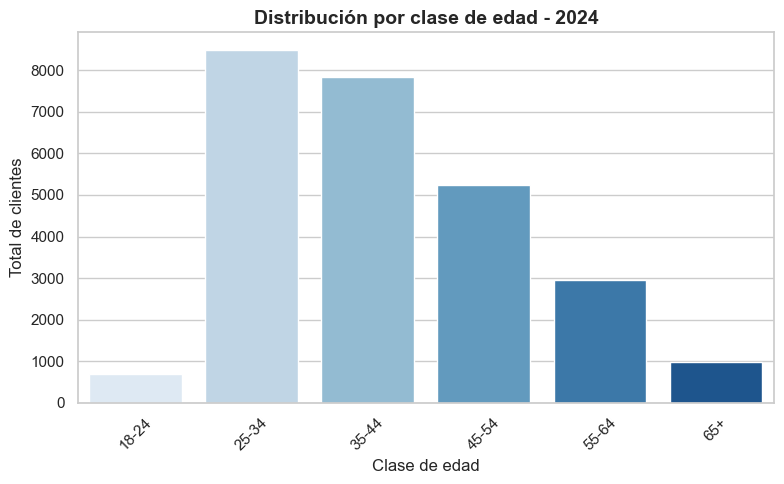

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_2024 = (
    df_banca2024
    .groupby("Clase de edad")
    .size()
    .reset_index(name="Total")
    .sort_values("Clase de edad")
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2024,
    x="Clase de edad",
    y="Total",
    palette=palette
)

plt.title("Distribución por clase de edad - 2024", fontsize=14, weight="bold")
plt.xlabel("Clase de edad", fontsize=12)
plt.ylabel("Total de clientes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



C:\Users\Pau\AppData\Local\Temp\ipykernel_10012\491210681.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


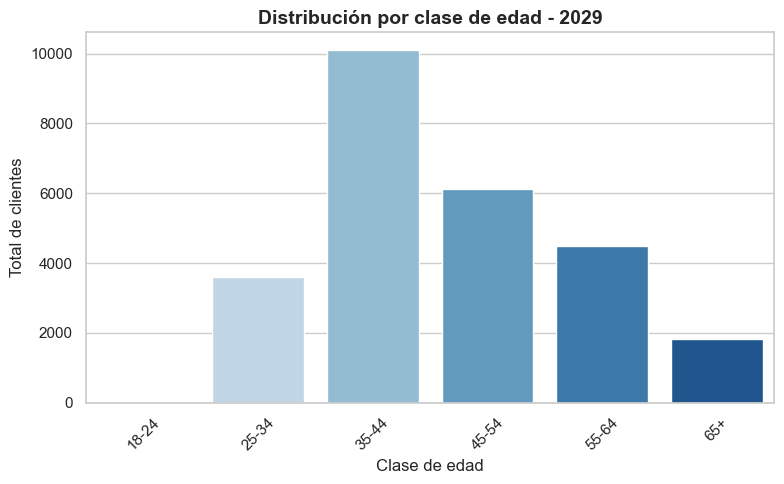

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_2024 = (
    df_banca2029
    .groupby("Clase de edad")
    .size()
    .reset_index(name="Total")
    .sort_values("Clase de edad")
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2024,
    x="Clase de edad",
    y="Total",
    palette=palette
)

plt.title("Distribución por clase de edad - 2029", fontsize=14, weight="bold")
plt.xlabel("Clase de edad", fontsize=12)
plt.ylabel("Total de clientes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_2025 = df_final[df_final["Periodo"] == 2029].copy()

df_2025 = (
    df_2025
    .groupby("Clase de edad", as_index=False)["Total"]
    .sum()
    .sort_values("Clase de edad")
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2025,
    x="Clase de edad",
    y="Total",
    palette=palette
)

plt.title("Distribución por clase de edad - 2029", fontsize=14, weight="bold")
plt.xlabel("Clase de edad", fontsize=12)
plt.ylabel("Total de población", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\favil\AppData\Local\Temp\ipykernel_158496\443703535.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\favil\AppData\Local\Temp\ipykernel_158496\443703535.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2025 = df_final[df_final["Periodo"] == 2025].copy()

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_2025,
    y="Clase de edad",
    x="Total",
    palette="Blues"
)
plt.title("Distribución por clase de edad - 2025", fontsize=14, weight="bold")
plt.xlabel("Total de población", fontsize=12)
plt.ylabel("Clase de edad", fontsize=12)
plt.xlim(0, 13_000_000)
plt.tight_layout()

# Guardar como PNG
plt.savefig(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\grafico_ine2025.png", dpi=150)
print("✅ Gráfico guardado como PNG")
plt.close()

✅ Gráfico guardado como PNG


C:\Users\favil\AppData\Local\Temp\ipykernel_158496\40637260.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [54]:
# INE 2029

import seaborn as sns
import matplotlib.pyplot as plt

df_2029 = df_final[df_final["Periodo"] == 2029].copy()

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_2029,
    y="Clase de edad",
    x="Total",
    palette="Blues"
)
plt.title("Distribución por clase de edad - 2029", fontsize=14, weight="bold")
plt.xlabel("Total de población", fontsize=12)
plt.ylabel("Clase de edad", fontsize=12)
plt.xlim(0, 13_000_000)
plt.tight_layout()

# Guardar como PNG
plt.savefig(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\grafico_ine2029.png", dpi=150)
print("✅ Gráfico guardado como PNG")
plt.close()

✅ Gráfico guardado como PNG


C:\Users\favil\AppData\Local\Temp\ipykernel_158496\828144304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\Pau\AppData\Local\Temp\ipykernel_10012\3348414058.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


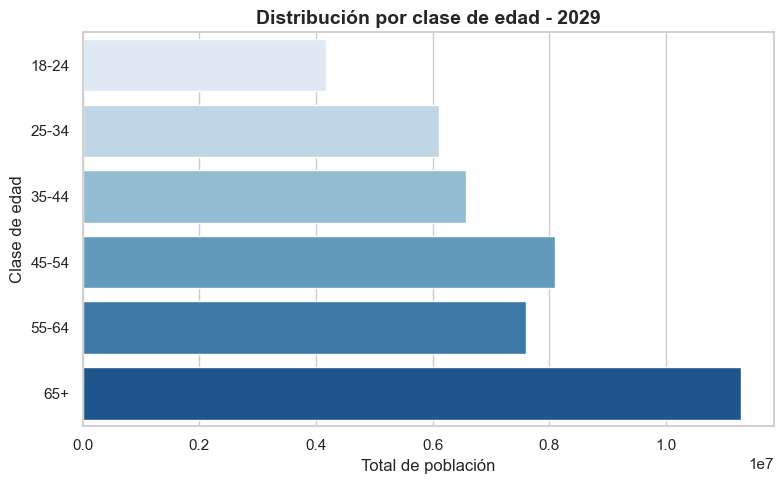

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_2025 = df_final[df_final["Periodo"] == 2029].copy()

df_2025 = (
    df_2025
    .groupby("Clase de edad", as_index=False)["Total"]
    .sum()
    .sort_values("Clase de edad") 
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2025,
    y="Clase de edad",  
    x="Total",          
    palette=palette
)

plt.title("Distribución por clase de edad - 2029", fontsize=14, weight="bold")
plt.xlabel("Total de población", fontsize=12)
plt.ylabel("Clase de edad", fontsize=12)
plt.tight_layout()

plt.show()


In [ ]:
# clients 2024
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

df_2029 = (
    df_banca2024
    .groupby("Clase de edad")
    .size()
    .reset_index(name="Total")
    .sort_values("Clase de edad") 
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2029,
    y="Clase de edad",  
    x="Total",          
    palette=palette
)

plt.title("Distribución por clase de edad - 2024", fontsize=14, weight="bold")
plt.xlabel("Total de clientes", fontsize=12)
plt.ylabel("Clase de edad", fontsize=12)
plt.xlim(0, 11_000)
plt.tight_layout()

plt.savefig(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\grafico_clients2024.png", dpi=150)
print("✅ Gráfico guardado como PNG")
plt.close()


✅ Gráfico guardado como PNG


C:\Users\favil\AppData\Local\Temp\ipykernel_158496\3955481399.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [ ]:
# clients 2029
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

df_2029 = (
    df_banca2029
    .groupby("Clase de edad")
    .size()
    .reset_index(name="Total")
    .sort_values("Clase de edad") 
)

sns.set(style="whitegrid")
palette = "Blues"

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_2029,
    y="Clase de edad",  
    x="Total",         
    palette=palette
)

plt.title("Distribución por clase de edad - 2024", fontsize=14, weight="bold")
plt.xlabel("Total de clientes", fontsize=12)
plt.ylabel("Clase de edad", fontsize=12)
plt.xlim(0, 11_000)
plt.tight_layout()

plt.savefig(r"C:\Users\favil\ProjecteData\Equip_16\Borrador\Marqueting y comunicacion\Week_4\grafico_clients2029.png", dpi=150)
print("✅ Gráfico guardado como PNG")
plt.close()

✅ Gráfico guardado como PNG


C:\Users\favil\AppData\Local\Temp\ipykernel_158496\3055834042.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
